# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Testing-the-difference-between-a-Binomial/Poisson-distribution-and-a-Gaussian-distribution-as-you-change-the-parameters-of-the-Binomial/Poisson-using:" data-toc-modified-id="Testing-the-difference-between-a-Binomial/Poisson-distribution-and-a-Gaussian-distribution-as-you-change-the-parameters-of-the-Binomial/Poisson-using:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using:</a></div><div class="lev1 toc-item"><a href="#AD-and-KS-test" data-toc-modified-id="AD-and-KS-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>AD and KS test</a></div><div class="lev2 toc-item"><a href="#KS:-high-p-value-pvalue&gt;0.05:-H0-that-sample-comes-from-a-Gaussian-distribution-cannot-be-rejected" data-toc-modified-id="KS:-high-p-value-pvalue>0.05:-H0-that-sample-comes-from-a-Gaussian-distribution-cannot-be-rejected-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>KS: high p-value pvalue&gt;0.05: H0 that sample comes from a Gaussian distribution cannot be rejected</a></div><div class="lev2 toc-item"><a href="#AD:-at-alpha-=-0.05-the-statistics-=-0.26-is-smaller-than-the-0.784-critical-value-for-$alpha$=0.05-(thresh_0.05-=-0.784):-the-H0-cannot-be-rejected." data-toc-modified-id="AD:-at-alpha-=-0.05-the-statistics-=-0.26-is-smaller-than-the-0.784-critical-value-for-$alpha$=0.05-(thresh_0.05-=-0.784):-the-H0-cannot-be-rejected.-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax MathJax_Processing" id="MathJax-Element-2-Frame" tabindex="0"></span><script type="math/tex" id="MathJax-Element-2">alpha</script>=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.</a></div><div class="lev1 toc-item"><a href="#try-writing-down-the-null-for-each-test-and-see-if-scipy-manual-agrees-with-you-(the-manual-spells-out-the-Null)" data-toc-modified-id="try-writing-down-the-null-for-each-test-and-see-if-scipy-manual-agrees-with-you-(the-manual-spells-out-the-Null)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>try writing down the null for each test and see if scipy manual agrees with you (the manual spells out the Null)</a></div><div class="lev1 toc-item"><a href="#KL-DIVERGENCE" data-toc-modified-id="KL-DIVERGENCE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>KL DIVERGENCE</a></div><div class="lev1 toc-item"><a href="#BINOMIAL---INSTRUCTIONS-for-assignment" data-toc-modified-id="BINOMIAL---INSTRUCTIONS-for-assignment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>BINOMIAL - INSTRUCTIONS for assignment</a></div><div class="lev2 toc-item"><a href="#WRITE-A-CAPTION-HERE-IN-THIS-CELL.." data-toc-modified-id="WRITE-A-CAPTION-HERE-IN-THIS-CELL..-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>WRITE A CAPTION HERE IN THIS CELL..</a></div><div class="lev1 toc-item"><a href="#POISSON---repeat-the-exercise-for-the-Poisson-distribution-increasing-the-lambda-parameter-of-the-distribution" data-toc-modified-id="POISSON---repeat-the-exercise-for-the-Poisson-distribution-increasing-the-lambda-parameter-of-the-distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution</a></div><div class="lev1 toc-item"><a href="#NOTE-on-KL-divergence:-the-KL-divergence-is-a-measure-of-how-much-approximation-you-have-to-do-to-represent-one-distribution-with-the-other-in-terms-of-information-content.-You-can-see-what-it-looks-point-by-point,-before-you-integrate-and-get-a-single-distance-number" data-toc-modified-id="NOTE-on-KL-divergence:-the-KL-divergence-is-a-measure-of-how-much-approximation-you-have-to-do-to-represent-one-distribution-with-the-other-in-terms-of-information-content.-You-can-see-what-it-looks-point-by-point,-before-you-integrate-and-get-a-single-distance-number-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number</a></div>


# Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using: 
    
    1) KS
    
    2) AD
    
    3) KL
    
    4) Pearson's chisq (not done in this example)
    
    I want you to use the scipy.stats package for this. For KS (Kolmogorov-Smirnoff) and AD (Anderson Darling) you simply need to generate the distribution against which you can test a normal (Gaussian) distribution: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL divergence test and chi square test do not. 

my usual imports and setups

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import scipy.stats as st

Populating the interactive namespace from numpy and matplotlib


Here are the manual pages for the three tests I am going to use. _scipy_ does not have the best documentation, but generally it provides clear examples of use for its functions. Read the documentation carefully.

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

# AD and KS test

I need to figure out what each test function returns. Let me run them once testing an obvious result: is a Gaussian Gaussian? I know the answer so this is a reality check to make sure I understand the output of the functions (and read the manual at the same time!)

I am testing a normal distribution (Gaussian, mean = 0, std = 1) against a Gaussian model, and a Poisson with small $lambda$, or a binomial _w small np against a Gaussian model_. I expect to find that in the first case the Gaussian is, well, Gaussian and in the second case that the binomial with small np is NOT Gaussian

In [2]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", st.kstest(dist_n,'norm'))
print ("normal on normal", st.anderson(dist_n, dist='norm'))
print ("") 

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



## KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

## AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.

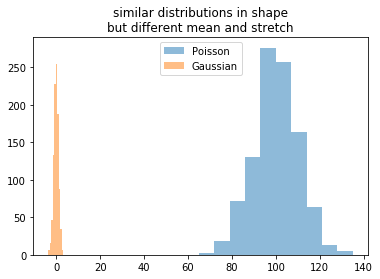

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547550585, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian but I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


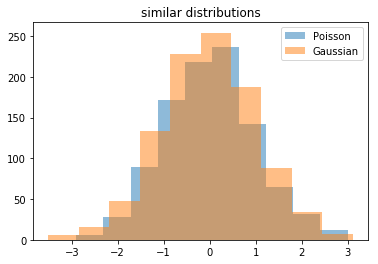

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: no longer rejecting the H0 at alpha=0.05 (p~0.3)
AD: statistics AD=0.93 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


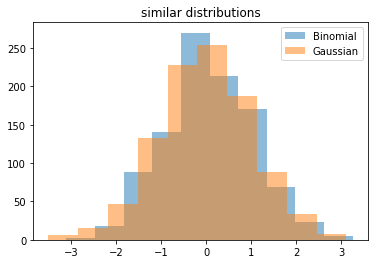

binomial vs normal KstestResult(statistic=0.049648705394760739, pvalue=0.013959864431395186)
binomial vs normal AndersonResult(statistic=1.1765054979813385, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [3]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", st.kstest(dist_p,'norm'))
print ("poisson on normal", st.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian " + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", st.kstest(dist_p,'norm'))
print ("poisson vs normal", st.anderson(dist_p, dist='norm'))
print ("KS: no longer rejecting the H0 at alpha=0.05 (p~0.3)") 
print ("AD: statistics AD=0.93 larger than threshold (for alpha=0.05) ") 

threshold = st.anderson(dist_n, 
                                 dist='norm')[1][st.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 200, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n * p) / np.sqrt(n * p * (1 - p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", st.kstest(dist_b,'norm'))
print ("binomial vs normal", st.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")


## Conclusion:

### KS
**Null Hypothesis:** 
The two given distributions are identical.

Test 1: p-value = 0 < alpha=0.05 => null hypothesis is rejected => generated poisson and gaussian samples are not from the same distribution

Test 2: p-value = 0.3 > alpha=0.05 => null hypothesis can not be rejected => generated poisson and gaussian samples are indeed from the same distribution

Test 3: p-value = 0.01 < alpha=0.05 => null hypothesis is rejected => generated binomial and gaussian samples are not from the same distribution

### AD
**Null Hypothesis**
The sample drawn from a given population follows a particular distribution

Test 1: statistics = 0.72 < 0.78(alpha threshold) => null hypothesis can not be rejected => generated poisson sample follows gaussian distribution

Test 2: statistics = 0.92 > 0.78 => null hypothesis is rejected => generated poisson sample does not follow gaussian distribution

Test 3: statistics = 1.18 > 0.78 => null hypothesis is rejected => generated binomial sample does not follow gaussian distribution



# KL DIVERGENCE

The KL divergence is a little trickier: 

__ empirical distribution__ 
it wants to know the distribution _y_ value at a location _x_.  have to pass it the values of the _distribution_ at some x's, not my histogram though, si I need a  **NORMALIZED HOSTOGRAM OF MY DISTRIBUTION**, i.e. derive a probability distribution function (PDF) from the data. 

__model__
Then I have to pass it a function for my comparison distribution evaluated at the same _x_-values where my empirical distribution is evaluated (not just the name of a distribution like for KS and AD)

In [4]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest


then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) 
evaluated at the bin centers of the histogram from before

In [5]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", st.entropy(distpdf_n, st.norm.pdf(bincenters_n)) )
print ("poisson on normal", st.entropy(distpdf_p, st.norm.pdf(bincenters_p)))

print ("binomial on normal", st.entropy(distpdf_b, st.norm.pdf(bincenters_p)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.013732307361


# BINOMIAL - INSTRUCTIONS for assignment

with the binomial distribution I can change n*p. larger n*p will make the distribution look more "normal" (i.e. Gaussian). 
In a loop test that the binomial tends to a normal distribution as you increase the value of n*p.

In [6]:
np.random.seed(999)
narray = np.linspace(10, 1000, 100)
narray.sort()
ks_s_b = np.zeros(len(narray))
ks_p_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi_s_b = np.zeros(len(narray))
chi_p_b = np.zeros(len(narray))
#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = st.kstest(dist,'norm')[0]
    ks_p_b[i] = st.kstest(dist,'norm')[1]
   
    ad_b[i] = st.anderson(dist, dist='norm')[0]
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    kl_b [i] =  st.entropy(np.histogram(dist, bins=mybins)[0] / 1000., st.norm.pdf(bincenters))
    
    chi_s_b[i] = st.chisquare(np.histogram(dist, bins=mybins)[0] / 1000., st.norm.pdf(bincenters))[0]
    chi_p_b[i] = st.chisquare(np.histogram(dist, bins=mybins)[0] / 1000., st.norm.pdf(bincenters))[1]

You want to see how the p-value (or the test statistics) behaves as a function of increasing n*p.
So you can plot the p-value (or the test statistics) against the n*p

think about how the captions are written in the paper  you have to read for last week assignment: a caption must describe the plot sufficiently well that I do not need to read the paper to understand it. 

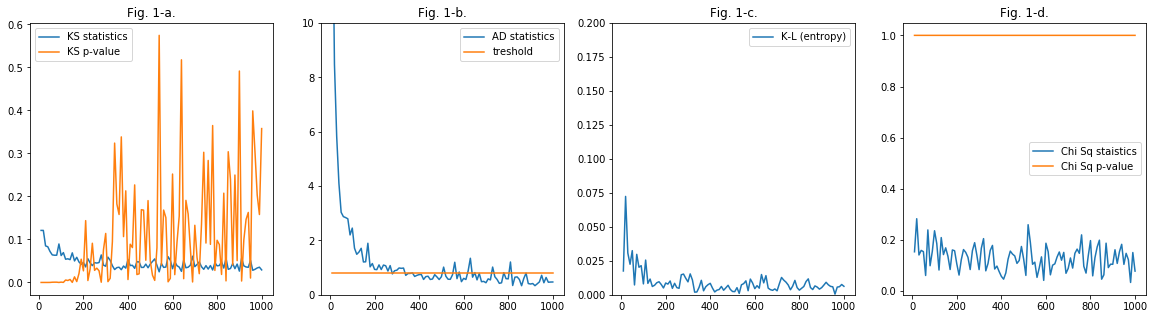

In [7]:

fig = pl.figure(figsize = (20,5))
fig.add_subplot(141)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.title('Fig. 1-a.')
pl.legend()

fig.add_subplot(142)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.title('Fig. 1-b.')
pl.legend()

fig.add_subplot(143)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.ylim(0,0.2)
pl.title('Fig. 1-c.')
pl.legend();

fig.add_subplot(144)
pl.plot(narray, chi_s_b, label='Chi Sq staistics')
pl.plot(narray, chi_p_b, label='Chi Sq p-value')
pl.title('Fig. 1-d.')
pl.legend();

**Goodness-of-fit with 4 tests for Binomial against Gaussian distributions as the sample size increases**

Fig. 1-a. KS test. The p-value increases dramatically while KS statistics tend to drop as the sample size increases. Therefore for the large sample set Binomial sample follows Normal Distribution

Fig. 1-b. AD test. The AD statistics decreases sharply as the sample size increases. Eventually it goes bellow the threshold. We can conclude that for the large number of samples Binomail distribution can be approximated to Gaussian.

Fig. 1-c. KL test. The entropy decreases as the sample size increases. We derive that for the large number of samples Binomail distribution follows Gaussian distribution.

Fig. 1-d. Chi Sq test. For the whole range of sample size the statistics is lower than p-value (which is constant and equal to 1.0). Therefore null hypothesis can not be rejected. 


# POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution

In [8]:
np.random.seed(999)
lamda = np.arange(1, 250)
ks_s_p = np.zeros(len(lamda))
ks_p_p = np.zeros(len(lamda))
ad_p = np.zeros(len(lamda))
kl_p = np.zeros(len(lamda))
chi_s_p = np.zeros(len(lamda))
chi_p_p = np.zeros(len(lamda))
#loop over the different values of n (or n and p)
for i,n in enumerate(lamda):
    #p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist_p = (np.random.poisson(n, 1000) - n) / np.sqrt(n)
    #run the tests. 
    ks_s_p[i] = st.kstest(dist_p,'norm')[0]
    ks_p_p[i] = st.kstest(dist_p,'norm')[1]
   
    ad_p[i] = st.anderson(dist_p, dist='norm')[0]
    mybins = np.linspace(min(dist_p), max(dist_p), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    kl_p [i] =  st.entropy(np.histogram(dist_p, bins=mybins)[0] / 1000., st.norm.pdf(bincenters))
    
    chi_s_p[i] = st.chisquare(np.histogram(dist_p, bins=mybins)[0] / 1000., st.norm.pdf(bincenters))[0]
    chi_p_p[i] = st.chisquare(np.histogram(dist_p, bins=mybins)[0] / 1000., st.norm.pdf(bincenters))[1]

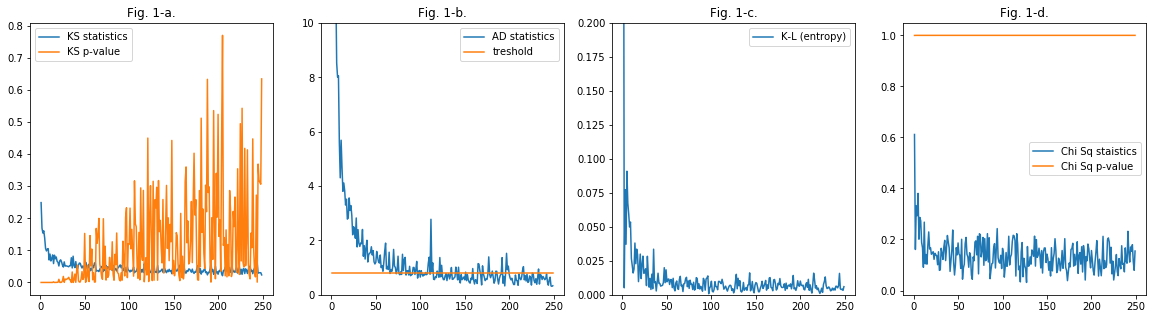

In [9]:
fig = pl.figure(figsize = (20,5))
fig.add_subplot(141)
pl.plot(lamda, ks_s_p, label='KS statistics')
pl.plot(lamda, ks_p_p, label='KS p-value')
pl.title('Fig. 1-a.')
pl.legend()

fig.add_subplot(142)
pl.plot(lamda, ad_p,  label='AD statistics')
pl.plot([lamda[0], lamda[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.title('Fig. 1-b.')
pl.legend()

fig.add_subplot(143)
pl.plot(lamda, kl_p, label='K-L (entropy)')
pl.ylim(0,0.2)
pl.title('Fig. 1-c.')
pl.legend();

fig.add_subplot(144)
pl.plot(lamda, chi_s_p, label='Chi Sq staistics')
pl.plot(lamda, chi_p_p, label='Chi Sq p-value')
pl.title('Fig. 1-d.')
pl.legend();

**Goodness-of-fit with 4 tests for Poisson against Gaussian distributions as the lambda parameter increases**

Fig. 1-a. KS test. The p-value increases dramatically while KS statistics tend to drop as the lambda increases. Therefore for the large sample set Poisson sample follows Normal Distribution

Fig. 1-b. AD test. The AD statistics decreases sharply as the lambda increases. Eventually it goes bellow the threshold. We can conclude that for the large number of samples Poisson distribution can be approximated to Gaussian.

Fig. 1-c. KL test. The entropy decreases as the lambda increases. We derive that for the large number of samples Poisson distribution follows Gaussian distribution.

Fig. 1-d. Chi Sq test. For the whole range of lambda the statistics is lower than p-value (which is constant and equal to 1.0). Therefore null hypothesis can not be rejected. 


# NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number

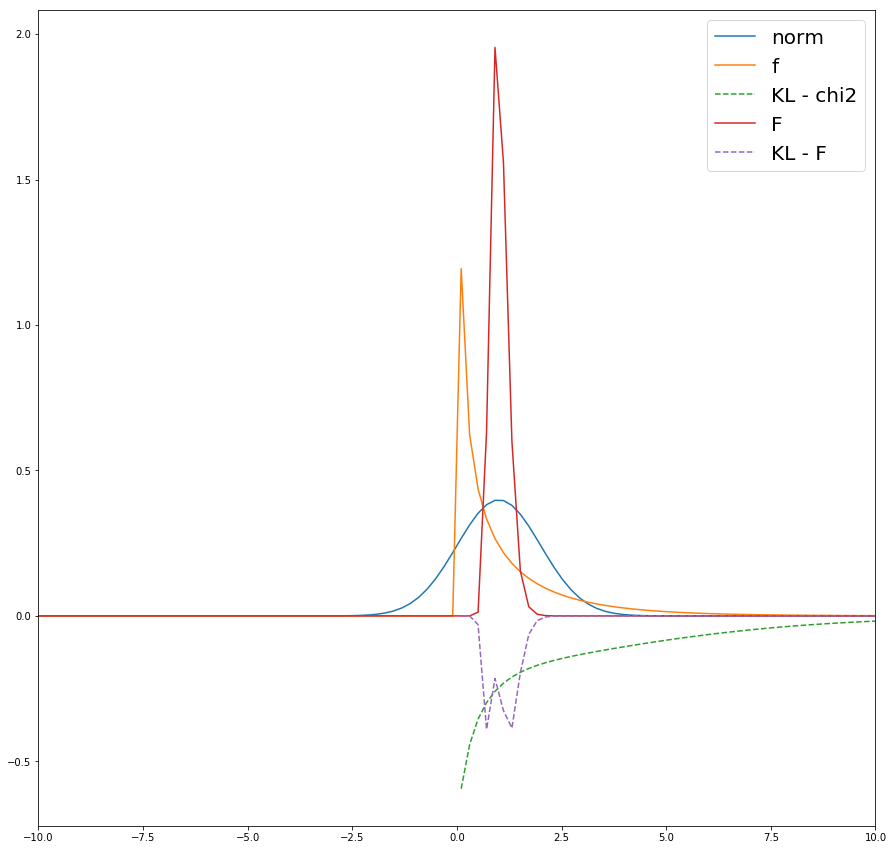

In [10]:
pl.figure(figsize=(15,15))

q = lambda x, mu : st.distributions.norm.pdf(x - mu)
c = lambda x, mu : st.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : st.distributions.f.pdf(x, 100, 100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);